# Alpha-Gomoku
智能的人工智能ai

## 包导入

In [1]:
import cv2 as cv
import numpy as np

---
## 读取图片
### 从本地文件夹读取
本项目可实际部署到jetbot智能车上使用，这里为了演示方便，使用从车上拍摄的照片进行演示。

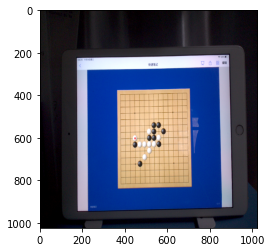

In [2]:
import matplotlib as plt
from board_scanner.utils import image_tool
image = cv.imread('./archive/image/origin_2.png')
image_tool.draw_img(image,'BGR')

### 从 jetbot 摄像头 读取照片

在电脑上使用时可不执行以下代码

In [ ]:
from jetbot import Camera

In [ ]:
import PIL.Image
from jetbot import Camera
camera = Camera.instance(width=1024, height=1024)

#从jetbot导入相机对象开启并初始化相机接口
image = np.array(PIL.Image.fromarray(camera.value))
cv.imwrite('./archive/images/origin_2.png',image)
print(image.shape)

---
## 棋盘检测

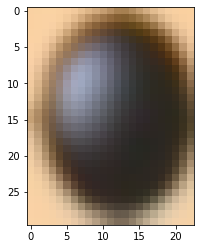

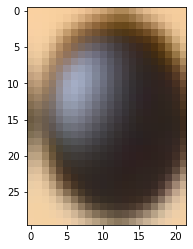

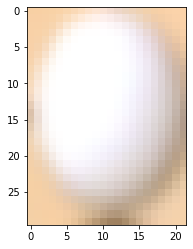

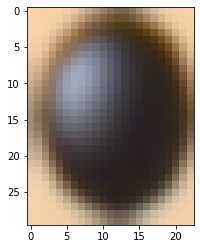

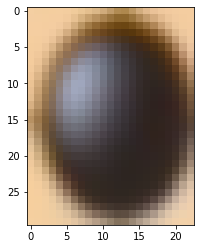

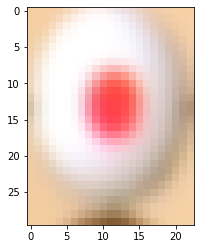

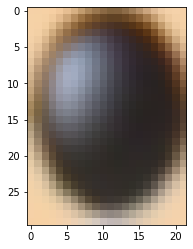

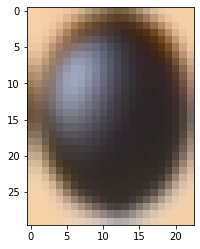

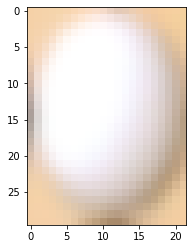

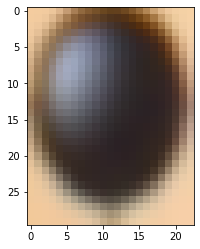

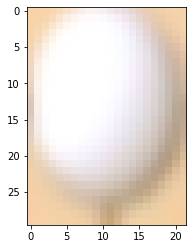

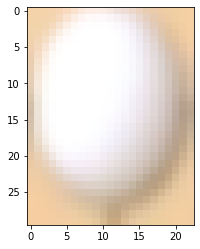

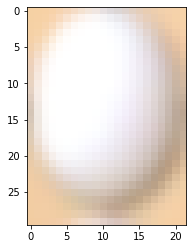

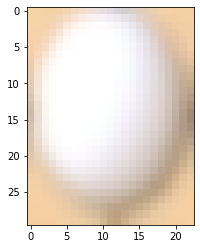

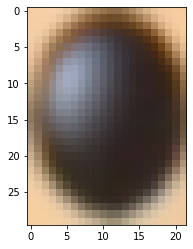

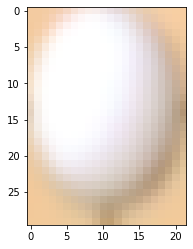

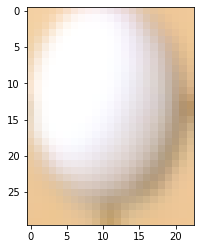

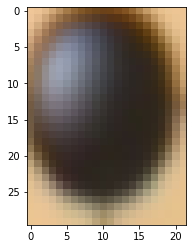

In [3]:
from board_scanner.src.object_detection_v2 import object_detection
from board_scanner.src.img2board_matrix import img2board_matrix
board_img = object_detection(image)   # 检测棋盘
board_matrix = img2board_matrix(board_img, 15, 15,margin_rate_w=0.01,margin_rate_h=0.01)   # 识别棋子

In [4]:
print(board_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 1 0 1 0 0 0 0 0]
 [0 0 0 2 0 0 1 1 2 0 0 0 0 0 0]
 [0 0 0 1 2 2 2 2 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


---
## AI
确保之前已部署example包

In [ ]:
from board_scanner.src.checkerboard import Checkerboard
board = Checkerboard(board_matrix)
print(board)
pos = board.predict_by_cpp(piece_color='black')
print(pos)

In [ ]:
board.update(pos,piece_color='black')
print(board)

### 继续对弈

### 棋手输入

In [ ]:
x = int(input('输入x'))
y = int(input('输入y'))
pos = (x,y)
board.update(pos,piece_color='white')
print(board)

### ai 输入 

In [ ]:
board.cur_step = 1
board.update(pos=board.predict_by_cpp(piece_color='black'),piece_color='black')
print(board)